# Project_1: How debts impact people's lives and their status of loan based on personal parameters.

* Loan_dataset & debt_ impact EDA 

In [7]:
#import all required dependencies for this EDA project:

import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')


In [8]:
# accessing the stored csv file path and read the data:
file_path_1 = Path("data/LoanDataset - LoansDatasest.csv") #this is the larger csv file.
file_path_2 = Path("data/debt_impact_data (2).csv") # this is the smaller csv file.

#reading the csv file:
loan_df = pd.read_csv(file_path_1)
impact_df = pd.read_csv(file_path_2)

In [9]:
# checking:
loan_df.head() #notice this is from UK for the pounds

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


In [10]:
impact_df.head() # this is from US.

,gender,age,profession,occupation,country_of_residence,urban_rural,owns_car,salary,cost_of_living,marital_status,has_kids,num_kids,debt_type,debt_amount,monthly_debt_payment,savings
0,Male,27,Marketing Specialist,Full-Time,United States,Urban,Yes (Loan),42929,Medium,Single,No,0,Student Loan,41999,5946,11612
1,Female,40,Pilot,Full-Time,United States,Rural,Yes (Loan),69733,High,Single,Yes,1,Student Loan,39599,4459,16244
2,Female,40,Writer,Full-Time,United States,Rural,Yes (Owned),116838,High,Single,No,1,Student Loan,38987,4953,10657
3,Female,37,Writer,Full-Time,United States,Rural,No,49245,High,Married,No,0,Student Loan,27108,735,12349
4,Male,23,Musician,Full-Time,United States,Rural,Yes (Loan),45168,Medium,Married,No,0,Student Loan,23551,6588,19260


In [11]:
loan_df.describe() # we can see some columns dtypes need to be changed.

,customer_id,customer_age,employment_duration,loan_int_rate,term_years,cred_hist_length
count,32583.000000,32586.000000,31691.000000,29470.000000,32586.000000,32586.000000
mean,16289.497806,27.732769,4.790161,11.011553,4.761738,5.804026
std,9405.919628,6.360528,4.142746,3.240440,2.471107,4.055078
min,1.000000,3.000000,0.000000,5.420000,1.000000,2.000000
25%,8144.500000,23.000000,2.000000,7.900000,3.000000,3.000000
50%,16288.000000,26.000000,4.000000,10.990000,4.000000,4.000000
75%,24433.500000,30.000000,7.000000,13.470000,7.000000,8.000000
max,32581.000000,144.000000,123.000000,23.220000,10.000000,30.000000


In [12]:
loan_df.info #checking 

<bound method DataFrame.info of        customer_id  customer_age customer_income home_ownership  \
0              1.0            22           59000           RENT   
1              2.0            21            9600            OWN   
2              3.0            25            9600       MORTGAGE   
3              4.0            23           65500           RENT   
4              5.0            24           54400           RENT   
...            ...           ...             ...            ...   
32581      32577.0            57           53000       MORTGAGE   
32582      32578.0            54          120000       MORTGAGE   
32583      32579.0            65           76000           RENT   
32584      32580.0            56          150000       MORTGAGE   
32585      32581.0            99           42000           RENT   

       employment_duration      loan_intent loan_grade   loan_amnt  \
0                    123.0         PERSONAL          C  £35,000.00   
1                      

In [13]:
loan_df.dtypes # need to change dtypes later.

customer_id            float64
customer_age             int64
customer_income         object
home_ownership          object
employment_duration    float64
loan_intent             object
loan_grade              object
loan_amnt               object
loan_int_rate          float64
term_years               int64
historical_default      object
cred_hist_length         int64
Current_loan_status     object
dtype: object

In [14]:
#check all the NaN 
loan_df.isna().sum() # need to drop NA later.

customer_id                3
customer_age               0
customer_income            0
home_ownership             0
employment_duration      895
loan_intent                0
loan_grade                 0
loan_amnt                  1
loan_int_rate           3116
term_years                 0
historical_default     20737
cred_hist_length           0
Current_loan_status        4
dtype: int64

In [15]:
# check for duplication:
loan_df.loc[loan_df.duplicated()] # need to get rid of duplicated roles.

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
323,323.0,25,120000,RENT,6.0,MEDICAL,A,"£1,000,000.00",10.74,10,N,2,DEFAULT
325,324.0,23,120000,RENT,7.0,EDUCATION,A,"£25,000.00",9.99,10,NaN,2,NO DEFAULT
14691,14688.0,21,32000,RENT,6.0,PERSONAL,B,"£15,000.00",15.27,1,Y,3,DEFAULT
14692,14689.0,22,38000,RENT,6.0,PERSONAL,A,"£15,000.00",7.88,2,N,3,DEFAULT
30289,30284.0,47,70000,RENT,3.0,HOMEIMPROVEMENT,A,"£6,000.00",8.49,7,N,12,NO DEFAULT
30290,30285.0,44,70000,RENT,15.0,DEBTCONSOLIDATION,A,"£6,000.00",5.79,4,N,16,DEFAULT


In [16]:
loan_df_test = loan_df.copy() #here making a copy of the original df.
loan_df_test = loan_df_test.drop_duplicates() # drop the duplicates on the copied df.

In [17]:
loan_df_test.columns 

Index(['customer_id', 'customer_age', 'customer_income', 'home_ownership',
       'employment_duration', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'term_years', 'historical_default', 'cred_hist_length',
       'Current_loan_status'],
      dtype='object')

In [18]:
#tidy up the loan_df_test and reframe the df only contains the wanted columns:
tidy_loan_df = loan_df_test[['customer_id', 'customer_age', 'customer_income', 'home_ownership',
       'employment_duration', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'term_years','historical_default','Current_loan_status']]
tidy_loan_df

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,DEFAULT
...,...,...,...,...,...,...,...,...,...,...,...,...
32581,32577.0,57,53000,MORTGAGE,1.0,PERSONAL,C,"£5,800.00",13.16,7,NaN,NO DEFAULT
32582,32578.0,54,120000,MORTGAGE,4.0,PERSONAL,A,"£17,625.00",7.49,4,NaN,NO DEFAULT
32583,32579.0,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,"£35,000.00",10.99,5,N,DEFAULT
32584,32580.0,56,150000,MORTGAGE,5.0,PERSONAL,B,"£15,000.00",11.48,6,NaN,NO DEFAULT


In [19]:
# same here make the copy of tidy loan df and drop NA.
test_copy = tidy_loan_df.copy()
test_copy = test_copy.dropna()

In [20]:
test_copy.shape

(10416, 12)

In [21]:
test_copy = test_copy.reset_index(drop=True).copy() #reseting the index to make it more readable.
test_copy

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,DEFAULT
1,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,DEFAULT
2,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,DEFAULT
3,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,DEFAULT
4,6.0,21,9900,OWN,2.0,VENTURE,A,"£2,500.00",7.14,1,N,DEFAULT
...,...,...,...,...,...,...,...,...,...,...,...,...
10411,32566.0,57,40000,RENT,1.0,MEDICAL,A,"£15,000.00",8.90,7,N,DEFAULT
10412,32569.0,60,49008,OWN,5.0,PERSONAL,C,"£12,000.00",13.79,6,Y,NO DEFAULT
10413,32572.0,60,45600,RENT,1.0,VENTURE,B,"£20,000.00",10.00,6,N,DEFAULT
10414,32575.0,52,65004,RENT,4.0,PERSONAL,D,"£20,000.00",15.58,2,Y,DEFAULT


In [22]:
# convert dtypes:
test_copy['customer_id'] = test_copy['customer_id'].astype(int).astype(str)
test_copy = test_copy.rename(columns={'loan_amnt':'loan_amnt(pounds)'})
test_copy['loan_amnt(pounds)'] = test_copy['loan_amnt(pounds)'].astype(str)
test_copy['loan_amnt(pounds)'] = test_copy['loan_amnt(pounds)'].str.strip()
test_copy['loan_amnt(pounds)'] = test_copy['loan_amnt(pounds)'].str.replace('£', '', regex=False)
test_copy['loan_amnt(pounds)'] = test_copy['loan_amnt(pounds)'].str.replace(',', '', regex=False)
test_copy['loan_amnt(pounds)'] = pd.to_numeric(test_copy['loan_amnt(pounds)'])
cleaned_loan_df = test_copy

cleaned_loan_df # this is the variable completed cleasing of the loan data, use this variable for all questions below.

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt(pounds),loan_int_rate,term_years,historical_default,Current_loan_status
0,1,22,59000,RENT,123.0,PERSONAL,C,35000.0,16.02,10,Y,DEFAULT
1,3,25,9600,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,N,DEFAULT
2,4,23,65500,RENT,4.0,MEDICAL,B,35000.0,15.23,10,N,DEFAULT
3,5,24,54400,RENT,8.0,MEDICAL,B,35000.0,14.27,10,Y,DEFAULT
4,6,21,9900,OWN,2.0,VENTURE,A,2500.0,7.14,1,N,DEFAULT
...,...,...,...,...,...,...,...,...,...,...,...,...
10411,32566,57,40000,RENT,1.0,MEDICAL,A,15000.0,8.90,7,N,DEFAULT
10412,32569,60,49008,OWN,5.0,PERSONAL,C,12000.0,13.79,6,Y,NO DEFAULT
10413,32572,60,45600,RENT,1.0,VENTURE,B,20000.0,10.00,6,N,DEFAULT
10414,32575,52,65004,RENT,4.0,PERSONAL,D,20000.0,15.58,2,Y,DEFAULT


# Analysis part:


Wang Han's part:

* Please complete your analysis below with plotting. Adding more cells if you need:

In [23]:
# Term years vs.Current loan status scatter plot

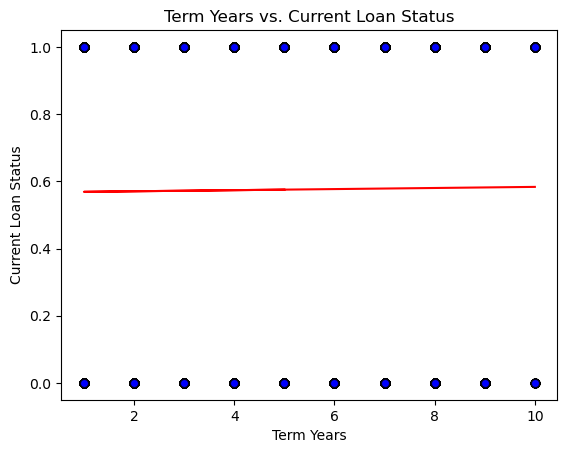

R squared: 0.000


<function __main__.plot_linear_regression(x_values, y_values, x_label, y_label, title, annotate_coords)>

In [24]:
# Function to create linear regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, annotate_coords):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    plt.scatter(x_values, y_values, edgecolors="k", facecolors="b", alpha=0.75, marker="o")
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, annotate_coords, fontsize=15, color="red")
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
    print(f"R squared: {rvalue**2:.3f}")

# Assuming 'cleaned_loan_df' is already defined and loaded
# Convert the relevant columns to float if they aren't already
cleaned_loan_df["term_years"] = cleaned_loan_df["term_years"].astype(float)
cleaned_loan_df["Current_loan_status"] = cleaned_loan_df["Current_loan_status"].map({"DEFAULT": 1, "NO DEFAULT": 0})
cleaned_loan_df["Current_loan_status"] = cleaned_loan_df["Current_loan_status"].astype(float)



# Extract the x and y values
x_values = cleaned_loan_df["term_years"]
y_values = cleaned_loan_df["Current_loan_status"]

# Create the scatter plot with linear regression
plot_linear_regression(x_values, y_values, "Term Years", "Current Loan Status", 
                       "Term Years vs. Current Loan Status", (10, 10))
plot_linear_regression

In [25]:
# Term years vs. historical default scatter plot

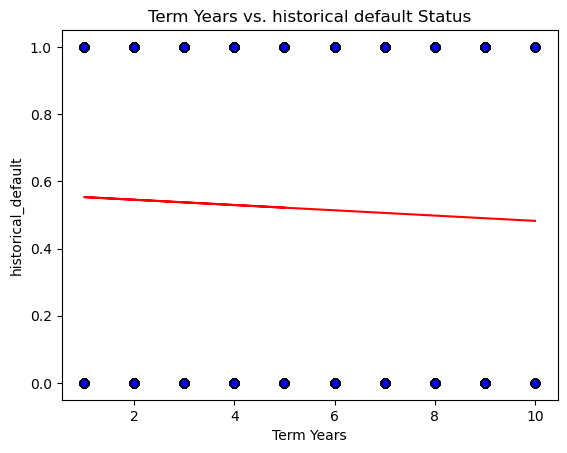

R squared: 0.002


<function __main__.plot_linear_regression(x_values, y_values, x_label, y_label, title, annotate_coords)>

In [26]:
# Function to create linear regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, annotate_coords):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    plt.scatter(x_values, y_values, edgecolors="k", facecolors="b", alpha=0.75, marker="o")
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, annotate_coords, fontsize=15, color="red")
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
    print(f"R squared: {rvalue**2:.3f}")

# Assuming 'cleaned_loan_df' is already defined and loaded
# Convert the relevant columns to float if they aren't already
cleaned_loan_df["term_years"] = cleaned_loan_df["term_years"].astype(float)
cleaned_loan_df["historical_default"] = cleaned_loan_df["historical_default"].map({"Y": 1, "N": 0})
cleaned_loan_df["historical_default"] = cleaned_loan_df["historical_default"].astype(float)



# Extract the x and y values
x_values = cleaned_loan_df["term_years"]
y_values = cleaned_loan_df["historical_default"]

# Create the scatter plot with linear regression
plot_linear_regression(x_values, y_values, "Term Years", "historical_default", 
                       "Term Years vs. historical default Status", (10, 10))
plot_linear_regression

In [27]:
#loan grade and repayment capabilities (% to customer income) 

In [38]:
# Calculate loan repayment of each customer ID

# Function to calculate monthly repayment
def calculate_monthly_repayment(loan_amnt_pounds, loan_int_rate, term_years):
    monthly_int_rate = loan_int_rate / 12 / 100
    loan_term_months = term_years * 12
    monthly_repayment = loan_amnt_pounds * (monthly_int_rate / (1 - np.power((1 + monthly_int_rate), -loan_term_months)))
    return monthly_repayment

# Apply the function to each row in the DataFrame
cleaned_loan_df['monthly_repayment'] = cleaned_loan_df.apply(
    lambda row: calculate_monthly_repayment(row['loan_amnt(pounds)'], row['loan_int_rate'], row['term_years']),
    axis=1
)

# Display the updated DataFrame
cleaned_loan_df.head()


,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt(pounds),loan_int_rate,term_years,historical_default,Current_loan_status,monthly_repayment
0,1,22,59000,RENT,123.0,PERSONAL,C,35000.0,16.02,10.0,1.0,1.0,586.732232
1,3,25,9600,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5.0,0.0,1.0,124.776191
2,4,23,65500,RENT,4.0,MEDICAL,B,35000.0,15.23,10.0,0.0,1.0,569.612203
3,5,24,54400,RENT,8.0,MEDICAL,B,35000.0,14.27,10.0,1.0,1.0,549.128818
4,6,21,9900,OWN,2.0,VENTURE,A,2500.0,7.14,1.0,0.0,1.0,216.478249


In [46]:
cleaned_loan_df.dtypes

customer_id             object
customer_age             int64
customer_income         object
home_ownership          object
employment_duration    float64
loan_intent             object
loan_grade              object
loan_amnt(pounds)      float64
loan_int_rate          float64
term_years             float64
historical_default     float64
Current_loan_status    float64
monthly_repayment      float64
dtype: object

In [52]:
# Calculate % loan repayment taken vs. customer income
cleaned_loan_df['customer_income'] = cleaned_loan_df['customer_income'].replace({'£': '', ',': ''}, regex=True).astype(float)

# Function to Calculate % loan repayment taken vs. customer income
def calculate_percentage_loan_to_income (customer_income, monthly_repayment):
    percentage_loan_to_income = monthly_repayment * 12 / customer_income * 100
    return percentage_loan_to_income

# Apply the function to each row in the DataFrame
cleaned_loan_df['percentage_loan_to_income'] = cleaned_loan_df.apply(
    lambda row: calculate_percentage_loan_to_income (row['customer_income'], row['monthly_repayment']),
    axis=1
)
# Display the updated DataFrame
cleaned_loan_df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt(pounds),loan_int_rate,term_years,historical_default,Current_loan_status,monthly_repayment,percentage_loan_to_income
0,1,22,59000.0,RENT,123.0,PERSONAL,C,35000.0,16.02,10.0,1.0,1.0,586.732232,11.933537
1,3,25,9600.0,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5.0,0.0,1.0,124.776191,15.597024
2,4,23,65500.0,RENT,4.0,MEDICAL,B,35000.0,15.23,10.0,0.0,1.0,569.612203,10.435643
3,5,24,54400.0,RENT,8.0,MEDICAL,B,35000.0,14.27,10.0,1.0,1.0,549.128818,12.113136
4,6,21,9900.0,OWN,2.0,VENTURE,A,2500.0,7.14,1.0,0.0,1.0,216.478249,26.239788


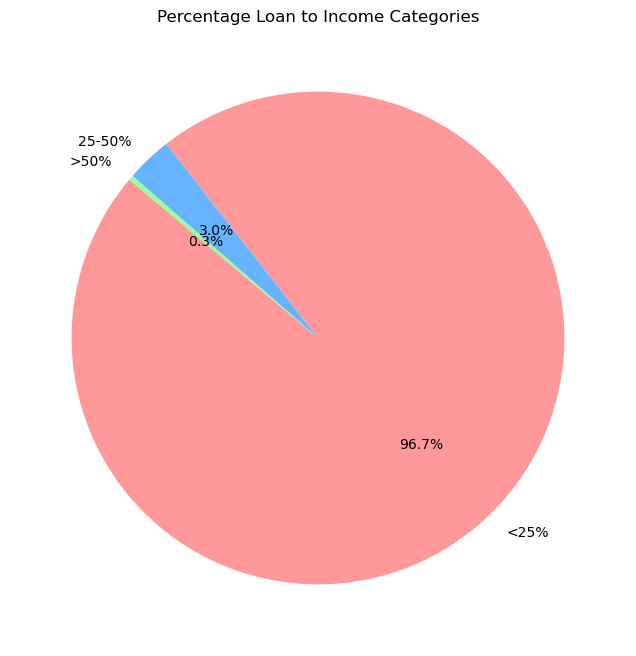

In [53]:
# show loan percentage to income pie chart

# Categorize the percentage loan to income
cleaned_loan_df['loan_to_income_category'] = pd.cut(
    cleaned_loan_df['percentage_loan_to_income'],
    bins=[0, 25, 50, np.inf],
    labels=['<25%', '25-50%', '>50%']
)

# Count the number of loans in each category
category_counts = cleaned_loan_df['loan_to_income_category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Percentage Loan to Income Categories')
plt.show()

Ziyue Zhou's part

* Please complete your analysis below with plotting. Adding more cells if you need:

Rivas Karki's part

* Please complete your analysis below with plotting. Adding more cells if you need:

Jordan Chia's part

* Please complete your analysis below with plotting. Adding more cells if you need: